In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## import dataset

In [3]:
import pandas as pd
# data = pd.read_csv('/content/drive/MyDrive/Neural_Network/ANN_course/Kaviani/3-cardio_train1.csv')
data = pd.read_csv('3-cardio_train1.csv')
data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
data['cardio'].unique()

array([0, 1], dtype=int64)

## cleaning

In [7]:
# data.isna().sum()

## encoding

In [9]:
# encode the data

## define x, y

In [11]:
x = data.iloc[:, 1:-1].values
x[:3]

array([[1.8393e+04, 2.0000e+00, 1.6800e+02, 6.2000e+01, 1.1000e+02,
        8.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0228e+04, 1.0000e+00, 1.5600e+02, 8.5000e+01, 1.4000e+02,
        9.0000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.8857e+04, 1.0000e+00, 1.6500e+02, 6.4000e+01, 1.3000e+02,
        7.0000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [12]:
y = data.iloc[:, -1]
y = pd.get_dummies(y).values
y[:3]

array([[ True, False],
       [False,  True],
       [False,  True]])

## spliting

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
x_train[:3]

array([[1.9687e+04, 1.0000e+00, 1.6800e+02, 7.5000e+01, 1.2000e+02,
        8.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0602e+04, 1.0000e+00, 1.6600e+02, 6.2000e+01, 1.3000e+02,
        8.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.3337e+04, 1.0000e+00, 1.5600e+02, 1.0000e+02, 1.1000e+02,
        7.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [16]:
y_train[:3]

array([[ True, False],
       [ True, False],
       [ True, False]])

## scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(x_train)
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)

In [19]:
x_train[:3]

array([[0.68826945, 0.        , 0.57948718, 0.29775281, 0.01836158,
        0.00727273, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.75911731, 0.        , 0.56923077, 0.2247191 , 0.0190678 ,
        0.00727273, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.97088657, 0.        , 0.51794872, 0.43820225, 0.01765537,
        0.00636364, 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [20]:
x_train[0].shape

(11,)

# model_1  --> Sequential()

In [22]:
import tensorflow as tf

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(11,)),  
    tf.keras.layers.Dense(11, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [23]:
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),              # 'adam'
    loss=tf.keras.losses.CategoricalCrossentropy(),    # 'CategoricalCrossentropy'
    metrics=[tf.keras.metrics.CategoricalAccuracy()]   # ['accuracy']
)

In [24]:
r1 = model_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=500)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - categorical_accuracy: 0.5504 - loss: 0.6855 - val_categorical_accuracy: 0.6115 - val_loss: 0.6552
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - categorical_accuracy: 0.6126 - loss: 0.6526 - val_categorical_accuracy: 0.6401 - val_loss: 0.6394
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.6345 - loss: 0.6400 - val_categorical_accuracy: 0.6442 - val_loss: 0.6335
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.6415 - loss: 0.6335 - val_categorical_accuracy: 0.6449 - val_loss: 0.6310
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.6389 - loss: 0.6334 - val_categorical_accuracy: 0.6485 - val_loss: 0.6284
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.6419 - loss: 0.6312 - val_categorical_accuracy: 0.6501 - val_loss: 0.6270
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.6434 - los

In [25]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              62 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,664 (6.50 KB)

 Trainable params: 554 (2.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,110 (4.34 KB)

## model_2  --> Model(i , X)

In [27]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

i = Input(shape=x_train[0].shape)
X = Dense(11, activation='relu')(i)
X = Dense(30, activation='relu')(X)
X = Dense(2, activation='softmax')(X)

model_2 = Model(i, X)

In [28]:
model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
r2 = model_2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=500)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5342 - loss: 0.6883 - val_accuracy: 0.6114 - val_loss: 0.6629
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6147 - loss: 0.6573 - val_accuracy: 0.6380 - val_loss: 0.6385
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6350 - loss: 0.6390 - val_accuracy: 0.6412 - val_loss: 0.6318
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6416 - loss: 0.6311 - val_accuracy: 0.6479 - val_loss: 0.6290
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6405 - loss: 0.6302 - val_accuracy: 0.6437 - val_loss: 0.6280
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6400 - loss: 0.6331 - val_accuracy: 0.6483 - val_loss: 0.6276
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6439 - loss: 0.6285 - val_accuracy: 0.6502 - val_loss: 0.6259
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6426 - loss: 0.6287 - val_accuracy: 0.

In [30]:
model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              62 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,664 (6.50 KB)

 Trainable params: 554 (2.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,110 (4.34 KB)

## visualizing

In [32]:
import matplotlib.pyplot as plt

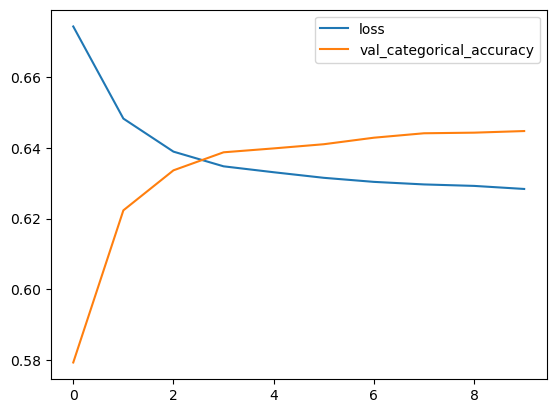

In [33]:
plt.plot(r1.history['loss'], label='loss')
plt.plot(r1.history['categorical_accuracy'], label='val_categorical_accuracy')
plt.legend()

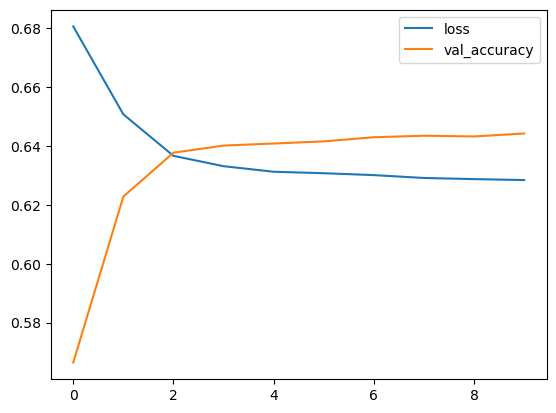

In [34]:
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['accuracy'], label='val_accuracy')
plt.legend()

## predict new data

In [36]:
model_1.predict(x_test)[3]

547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.38911566, 0.6108843 ], dtype=float32)

In [37]:
import numpy as np
print(np.argmax(model_1.predict(x_test)[3]))

547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
1


In [38]:
y_test[3]

array([False,  True])

## save the model

In [ ]:
# save the model

## load the model

In [ ]:
# load the model